## Importing important Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import datetime
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
%matplotlib inline
import charset_normalizer

C:\Users\sarth\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv("C:\\Users\\sarth\\Downloads\\games.csv\\games.csv", encoding="Utf-8")
df.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57


In [3]:
def fuzzymatching(name,name_in):
    d1={}
    for match, score, row in process.extract(name,name_in,limit=2):
        if score>=95:
            d1[name]=match
    print(d1)

## Data Cleaning

In [4]:
df.isnull().sum()

id                 0
name               0
released         686
added              0
playtime           0
reviews_count      0
ratings_count      0
rating             0
dtype: int64

In [5]:
print((df.released.isnull().sum()/df.released.count())*100) # Determining the percentage of null values.
(df.isnull().sum()/np.product(df.shape))*100 # Determining the percentage of null values out of total values.

3.4482758620689653


id               0.000000
name             0.000000
released         0.416667
added            0.000000
playtime         0.000000
reviews_count    0.000000
ratings_count    0.000000
rating           0.000000
dtype: float64

In [6]:
df.dtypes # Checking data type of each column to change Datetime or parse date.

id                 int64
name              object
released          object
added              int64
playtime           int64
reviews_count      int64
ratings_count      int64
rating           float64
dtype: object

In [7]:
df['released']=pd.to_datetime(df['released'], infer_datetime_format=True) # Parsing dates.

C:\Users\sarth\AppData\Local\Temp\ipykernel_10300\3117162316.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df.released,shade=True)


<AxesSubplot: xlabel='released', ylabel='Density'>

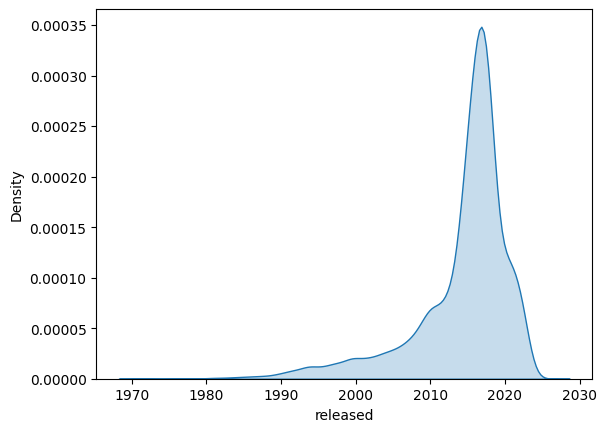

In [8]:
import seaborn as sns
sns.kdeplot(data=df.released,shade=True)

In [9]:
mode=df.released.mode()
mode

0   2016-04-05
Name: released, dtype: datetime64[ns]

In [10]:
df.released.fillna(mode.item(),inplace=True)

C:\Users\sarth\AppData\Local\Temp\ipykernel_10300\2637432643.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df.released,shade=True)


<AxesSubplot: xlabel='released', ylabel='Density'>

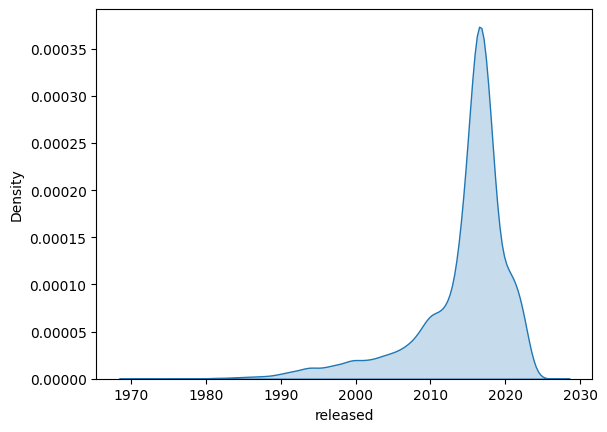

In [11]:
sns.kdeplot(data=df.released,shade=True)

In [12]:
df.isnull().sum() # Checking is any null values are left.

id               0
name             0
released         0
added            0
playtime         0
reviews_count    0
ratings_count    0
rating           0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True) # Droping the duplicate values.

In [14]:
df.duplicated().sum() # Checking if any duplicate values are left if any.

0

In [15]:
df['Year']=df.released.dt.year #Deriving Year from released dates.
df

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012
...,...,...,...,...,...,...,...,...,...
20575,12023,The Astonishing Game,2017-02-02,45,1,0,0,0.00,2017
20576,11780,FootRock,2017-04-14,45,4,3,3,0.00,2017
20577,11697,EDEN STAR,2015-01-30,45,2,2,2,0.00,2015
20578,11659,Super Jagua,2016-09-15,45,3,0,0,0.00,2016


In [16]:
df['month']=df.released.dt.month # Deriving months from released date.
df

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,9
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,5
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,4
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,3
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,8
...,...,...,...,...,...,...,...,...,...,...
20575,12023,The Astonishing Game,2017-02-02,45,1,0,0,0.00,2017,2
20576,11780,FootRock,2017-04-14,45,4,3,3,0.00,2017,4
20577,11697,EDEN STAR,2015-01-30,45,2,2,2,0.00,2015,1
20578,11659,Super Jagua,2016-09-15,45,3,0,0,0.00,2016,9


In [17]:
df

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,9
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,5
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,4
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,3
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,8
...,...,...,...,...,...,...,...,...,...,...
20575,12023,The Astonishing Game,2017-02-02,45,1,0,0,0.00,2017,2
20576,11780,FootRock,2017-04-14,45,4,3,3,0.00,2017,4
20577,11697,EDEN STAR,2015-01-30,45,2,2,2,0.00,2015,1
20578,11659,Super Jagua,2016-09-15,45,3,0,0,0.00,2016,9


In [18]:
df['rating_points']=df.ratings_count*df.rating
df

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,9,28304.04
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,5,28095.14
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,4,24315.06
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,3,14823.00
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,8,11552.52
...,...,...,...,...,...,...,...,...,...,...,...
20575,12023,The Astonishing Game,2017-02-02,45,1,0,0,0.00,2017,2,0.00
20576,11780,FootRock,2017-04-14,45,4,3,3,0.00,2017,4,0.00
20577,11697,EDEN STAR,2015-01-30,45,2,2,2,0.00,2015,1,0.00
20578,11659,Super Jagua,2016-09-15,45,3,0,0,0.00,2016,9,0.00


In [19]:
df.name.count() #Total number of Games record we have.

20000

In [20]:
df.name.nunique() #Total number of distinct games we have.

20000

In [21]:
df.name.str.strip() #Removing trailing space from names of games.


0                      Grand Theft Auto V
1                The Witcher 3: Wild Hunt
2                                Portal 2
3                      Tomb Raider (2013)
4        Counter-Strike: Global Offensive
                       ...               
20575                The Astonishing Game
20576                            FootRock
20577                           EDEN STAR
20578                         Super Jagua
20579                          Sleengster
Name: name, Length: 20000, dtype: object

In [22]:
print(df.name.unique())
process.extract("Portal 2", df['name'], limit=10) #Checking spelling errors in Portal 2 using fuzzywuzzy.

#Checking errors in format of writing or spelling using fuzzywuzzy.
#for name in fuzzy_names:
#    fuzzymatching(name,df.name)

['Grand Theft Auto V' 'The Witcher 3: Wild Hunt' 'Portal 2' ...
 'EDEN STAR' 'Super Jagua' 'Sleengster']


[('Portal 2', 100, 2),
 ('Portal', 95, 5),
 ('Portal 2 Sixense Perceptual Pack', 90, 2381),
 ('OR', 90, 6337),
 ('POSTAL 2', 88, 281),
 ('Left 4 Dead 2', 86, 6),
 ('Red Dead Redemption 2', 86, 9),
 ('Borderlands 2', 86, 10),
 ('Team Fortress 2', 86, 19),
 ('The Witcher 2: Assassins of Kings Enhanced Edition', 86, 33)]

## Analyzing Insights

In [23]:
df.describe() #summarizing the dataset

,id,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,101700.248450,527.795500,3.278800,75.425050,74.58400,2.162249,2013.804350,6.602100,280.686655
std,183268.962241,1153.404045,11.124192,252.503857,249.81441,1.671908,6.559194,3.401566,1041.460833
min,1.000000,45.000000,0.000000,0.000000,0.00000,0.000000,1971.000000,1.000000,0.000000
25%,13771.000000,82.000000,1.000000,3.000000,3.00000,0.000000,2012.000000,4.000000,0.000000
50%,21665.500000,154.000000,2.000000,12.000000,12.00000,2.750000,2016.000000,7.000000,34.980000
75%,55261.500000,436.000000,4.000000,42.250000,42.00000,3.630000,2017.000000,10.000000,141.590000
max,960912.000000,19385.000000,900.000000,6421.000000,6332.00000,4.800000,2025.000000,12.000000,28304.040000


In [24]:
df.head() 

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,9,28304.04
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,5,28095.14
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,4,24315.06
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,3,14823.00
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,8,11552.52


In [25]:
df.loc[:,['name','playtime','Year']].sort_values(by=['playtime'], ascending=False) # Most played games of all time.

,name,playtime,Year
3618,"Pokémon Gold, Silver",900,1999
16494,NAVYFIELD,499,2017
4917,Pokémon GO,367,2016
1899,Vampire: The Masquerade - Bloodlines 2,329,2023
7303,osu!,281,2007
...,...,...,...
17155,Race Pro,0,2009
17156,DW:GUNDAM,0,2007
17157,Monster Hunter Generations,0,2016
1986,Animal Crossing: New Horizons,0,2020


In [23]:
df.loc[df.Year==1999].sort_values(by='playtime', ascending=False) #Especially for the year 1999.

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
3618,27936,"Pokémon Gold, Silver",1999-11-21,797,900,404,401,4.39,1999,11,1760.39
15937,31690,Tom Clancy's Rainbow Six: Rogue Spear,1999-08-31,80,60,26,26,3.77,1999,8,98.02
16907,58009,Yu-Gi-Oh! Forbidden Memories,1999-12-09,71,52,34,34,4.03,1999,12,137.02
13934,53091,Legend of Mana (1999),1999-07-15,98,42,40,40,4.28,1999,7,171.20
6734,52799,Chrono Cross,1999-11-18,323,42,135,133,4.40,1999,11,585.20
...,...,...,...,...,...,...,...,...,...,...,...
14024,29733,Army Men: Sarge's Heroes,1999-09-30,97,0,44,44,3.55,1999,9,156.20
13946,30843,Петька и Василий Иванович 2: Судный день,1999-09-30,98,0,52,52,4.02,1999,9,209.04
5354,542578,EverQuest (1999),1999-03-16,466,0,23,22,2.65,1999,3,58.30
13840,57675,Pepsiman,1999-03-04,99,0,42,42,3.90,1999,3,163.80


In [24]:
df.groupby('Year').apply(lambda df:df.loc[df.playtime.idxmax()]) # Most played games per year.

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
Year,,,,,,,,,,,
1971,56681,The Oregon Trail (1971),1971-01-01,73,0,35,32,3.63,1971,1,116.16
1972,53138,Pong (1972),1972-01-01,106,0,55,51,3.71,1972,1,189.21
1976,52402,Breakout (1976),1976-01-01,51,0,23,21,3.30,1976,1,69.30
1978,52444,Space Invaders (1978),1978-06-01,126,0,63,63,3.79,1978,6,238.77
1979,22991,Akalabeth: World of Doom,1979-12-31,1288,1,81,80,2.04,1979,12,163.20
1980,24881,Pac-Man,1980-05-22,725,4,278,275,4.05,1980,5,1113.75
1981,52512,Donkey Kong,1981-07-09,375,10,174,171,3.75,1981,7,641.25
1982,52567,Popeye,1982-01-01,111,4,58,57,3.74,1982,1,213.18
1983,34334,Antarctic Adventure,1983-12-01,49,5,24,23,3.92,1983,12,90.16


In [25]:
df.groupby("Year").apply(lambda df:df.loc[df.rating.idxmax()]).sort_values(by=['rating'], ascending= False) # Most rated games every year.

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
Year,,,,,,,,,,,
2022,644661,AI: THE SOMNIUM FILES - nirvanA Initiative,2022-06-24,134,28,10,10,4.80,2022,6,48.00
2016,43252,The Witcher 3: Wild Hunt – Blood and Wine,2016-05-30,922,0,536,528,4.80,2016,5,2534.40
2019,10338,Gates of Hell,2019-11-05,109,4,9,8,4.78,2019,11,38.24
2020,339958,Persona 5 Royal,2020-03-31,2506,9,377,367,4.76,2020,3,1746.92
2023,662316,Marvel's Spider-Man 2,2023-12-31,348,0,12,12,4.75,2023,12,57.00
2015,43050,The Witcher 3: Wild Hunt – Hearts of Stone,2015-10-13,963,0,598,590,4.75,2015,10,2802.50
2012,4167,Mass Effect Trilogy,2012-11-06,241,0,127,126,4.75,2012,11,598.50
2014,3636,The Last Of Us Remastered,2014-07-29,8476,16,2759,2732,4.69,2014,7,12813.08
2018,62527,The House in Fata Morgana: A Requiem for Innoc...,2018-05-17,99,13,6,6,4.67,2018,5,28.02


In [26]:
df.groupby('Year').apply(lambda df:df.loc[df.ratings_count.idxmax()]) 

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points
Year,,,,,,,,,,,
1971,56681,The Oregon Trail (1971),1971-01-01,73,0,35,32,3.63,1971,1,116.16
1972,53138,Pong (1972),1972-01-01,106,0,55,51,3.71,1972,1,189.21
1976,52402,Breakout (1976),1976-01-01,51,0,23,21,3.30,1976,1,69.30
1978,52444,Space Invaders (1978),1978-06-01,126,0,63,63,3.79,1978,6,238.77
1979,22991,Akalabeth: World of Doom,1979-12-31,1288,1,81,80,2.04,1979,12,163.20
1980,24881,Pac-Man,1980-05-22,725,4,278,275,4.05,1980,5,1113.75
1981,52512,Donkey Kong,1981-07-09,375,10,174,171,3.75,1981,7,641.25
1982,52513,Donkey Kong Jr.,1982-01-01,129,0,59,58,3.61,1982,1,209.38
1983,53196,Bomberman (1983),1983-07-01,256,0,139,136,4.11,1983,7,558.96


In [27]:
df["reviews_probability"]=(df.ratings_count/df.reviews_count)*100 # Determining the probality of rating a game if it is reviewed.
df.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating,Year,month,rating_points,reviews_probability
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,9,28304.04,98.613923
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,5,28095.14,98.480889
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,4,24315.06,99.114878
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,3,14823.00,99.294628
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,8,11552.52,99.051117


In [28]:
top_production=df.groupby('Year').id.count().sort_values(ascending=False) # Top 5 Years having most released games.
top_production

Year
2017    2765
2016    2756
2015    2119
2018    1729
2014    1399
2020     963
2019     913
2021     820
2013     752
2012     597
2022     557
2010     520
2011     476
2009     464
2008     366
2007     272
2006     259
2005     217
2004     202
2003     185
1999     166
2001     161
2002     142
2000     132
1997     117
1998     115
1993     109
1996     108
2023     107
1994      91
1995      87
1991      69
1992      60
1990      38
1989      36
1987      26
1988      20
1985      16
1986      16
1984      14
1983       9
1982       8
1981       7
1979       4
1980       3
2024       3
1971       1
1972       1
1978       1
1976       1
2025       1
Name: id, dtype: int64

In [29]:
# Most favourite games of all time.
fav_dec=df.loc[:,['name','added','Year','rating']].sort_values(by= ['added'], ascending= False)
fav_dec.head(5)

,name,added,Year,rating
0,Grand Theft Auto V,19385,2013,4.47
1,The Witcher 3: Wild Hunt,18567,2015,4.66
2,Portal 2,17494,2011,4.62
3,Tomb Raider (2013),15290,2013,4.05
4,Counter-Strike: Global Offensive,15174,2012,3.57


In [30]:
fav_dec.groupby('Year').added.sum().sort_values(ascending= False).head() # Year-wise production of favourite games.

Year
2016    1163553
2015    1079434
2014     912887
2017     899649
2013     803165
Name: added, dtype: int64

## Data Visualization

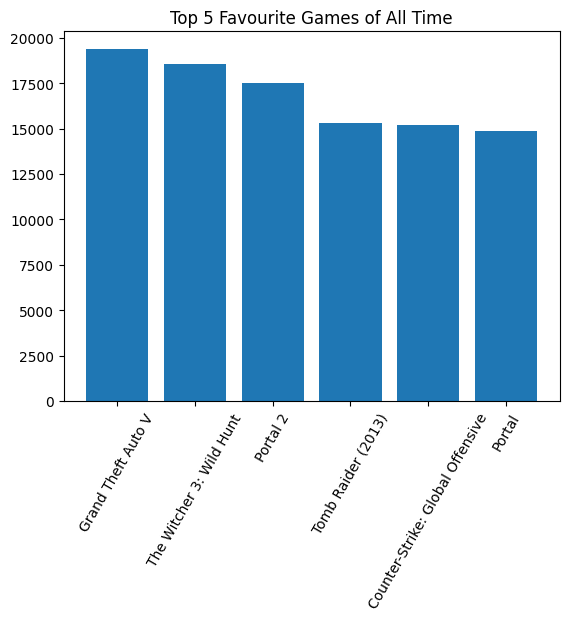

In [31]:
plt.bar(fav_dec.loc[:5,'name'],fav_dec.loc[:5,'added'])
plt.xticks(rotation=60)
plt.title("Top 5 Favourite Games of All Time")
plt.show()

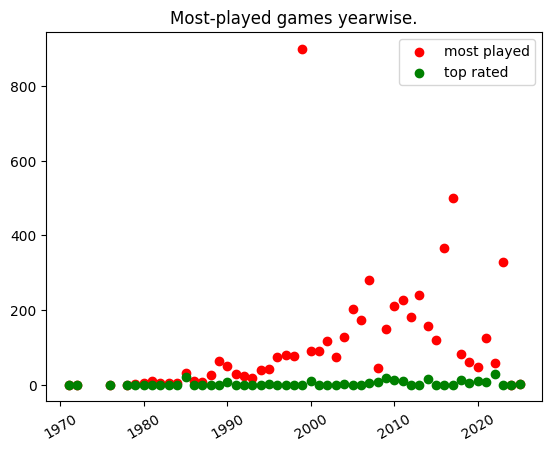

In [32]:
most_played=df.groupby('Year').apply(lambda df:df.loc[df.playtime.idxmax()])
top_rated=df.groupby("Year").apply(lambda df:df.loc[df.rating.idxmax()])
plt.scatter(most_played.Year, most_played.playtime, label='most played',color='red')
plt.scatter(top_rated['Year'], top_rated.playtime,label='top rated', color="green")
plt.xticks(rotation=30)
plt.title("Most-played games yearwise.")
plt.legend()
plt.show()

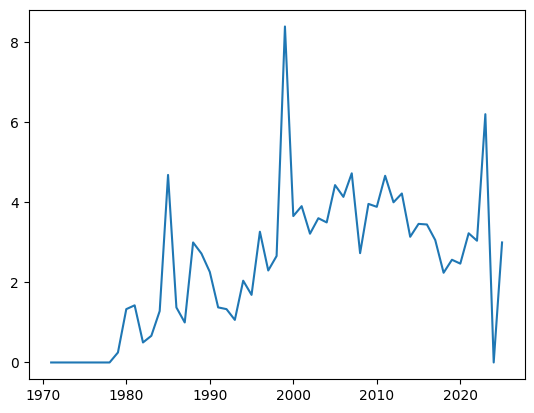

In [33]:
plt.plot(df.groupby('Year').playtime.mean())
plt.show()

Text(0.5, 1.0, 'Most played games vs Maximum rating points')

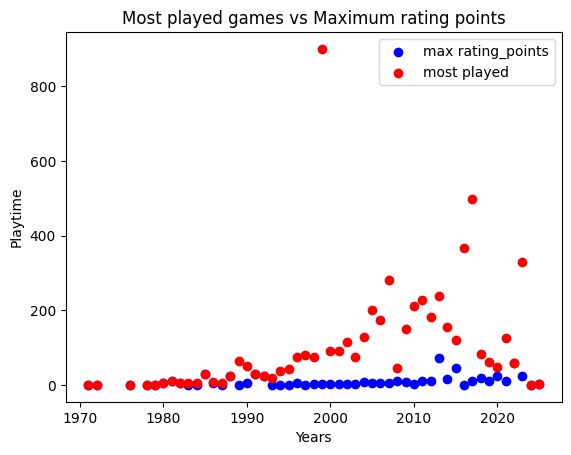

In [34]:
max_rating_points=df.groupby('Year').apply(lambda df:df.loc[df.rating_points.idxmax()])
plt.scatter(max_rating_points.Year,max_rating_points.playtime,label="max rating_points",color='blue')
plt.scatter(most_played.Year,most_played.playtime,label="most played",color='red')
plt.xlabel("Years")
plt.ylabel("Playtime")
plt.legend()
plt.title("Most played games vs Maximum rating points")

In [35]:

#Conclusions:
#1. Most rated games are not always the top played ones. Some of them however, are most popular ones. Hence, rating of any game
#    can't be considered as criteria of determining popularity of any game.
#2. There is a high chance that people reveiwing a game will give good ratings.
#3. Our data is not supporting the hypothesis that playtime of games having most rating points yearwise will align with 
#    playtime of most played games per year.
#3. There was significant increase in production of games after 2013. Also, total playtime and average playtime was significantly
#    increased after increase in production of games.
#4. The most played game of all time is Pokémon Gold, Silver which was released in 1999, due to which there was an abnormal
#    increase in averege playtime in 1999.
#5. The most favourite and most rated games of all time are Grand Theft Auto V and AI: THE SOMNIUM FILES - nirvanA Initiative
#    respectively.
